In [1]:
from models import GMMGenerator
import torch
import matplotlib.pyplot as plt

In [2]:
Generator = GMMGenerator.GMMGenerator(32,32)

In [3]:

phi = torch.tensor([
    [-1.0, 2.0, 0.0],
    [-1.0, 1.0, 0.0],
    [-1.0, 0.0, 0.0],
    [-1.0,-1.0, 0.0],
    [-1.0,-2.0, 0.0],
    [ 0.0,-2.0, 0.0],
    [ 1.0,-2.0, 0.0]
    ])
phi = phi * 0.3
phi = torch.cat((phi,torch.ones(phi.size(0),1)*0.1),dim=1)
phi = torch.cat((phi,torch.ones(phi.size(0),1)/6.0),dim=1)


In [4]:
theta = torch.tensor([[0.0, 0.0, 90.0*torch.pi/180]])
delta = torch.zeros((theta.size(0),2))

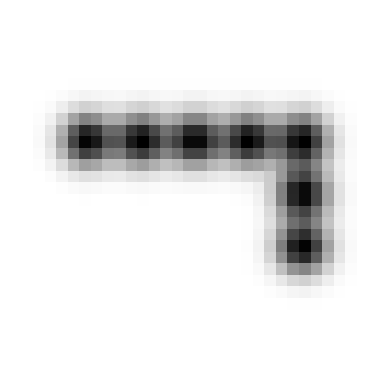

In [5]:
res = Generator(phi, theta, delta)
res = res.detach().numpy().squeeze()
plt.imshow(res, cmap='gray')
plt.axis('off')
plt.show()

In [6]:
angles = torch.linspace(0, 360, steps=36)
angles = angles * torch.pi / 180.0

theta = torch.zeros((angles.size(0), 3))
theta[:, 2] = angles

delta = torch.zeros((theta.size(0),2))

In [7]:
Images = Generator(phi, theta, delta)
Images = Images.detach()

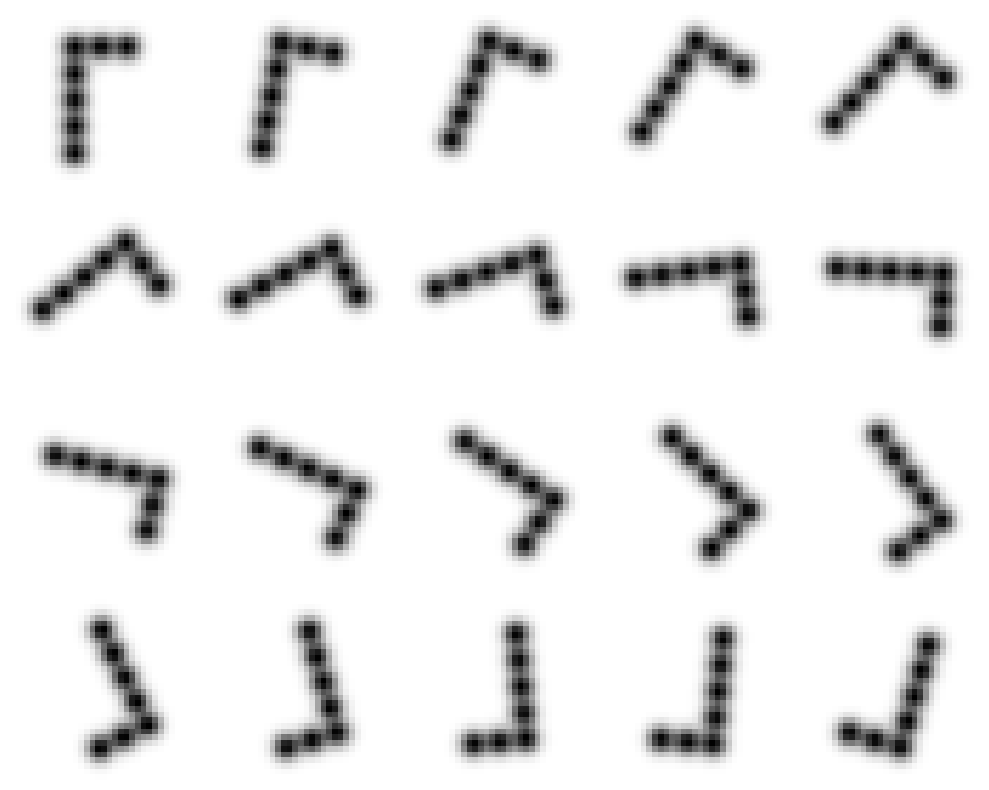

In [8]:
selected_images = Images[:20]

# Plot the selected images
fig, axs = plt.subplots(4, 5, figsize=(10, 8))
axs = axs.flatten()

for i in range(20):
    axs[i].imshow(selected_images[i], cmap='gray')
    axs[i].axis('off')

plt.tight_layout()
plt.show()

In [9]:
import os
import numpy as np
import pandas as pd
from torchvision.utils import save_image


In [10]:
random_matrix = np.random.rand(540, 1)

# Convert the matrix to a DataFrame without column names
df = pd.DataFrame(random_matrix)

# Save the DataFrame to a CSV file
save_dir = '.\datasets\GMM_SO1_32'
os.makedirs(save_dir, exist_ok=True)
save_path = os.path.join(save_dir, 'A.csv')
df.to_csv(save_path, index=False, header=False)

In [11]:
save_path = os.path.join(save_dir, 'B')
os.makedirs(save_path, exist_ok=True)

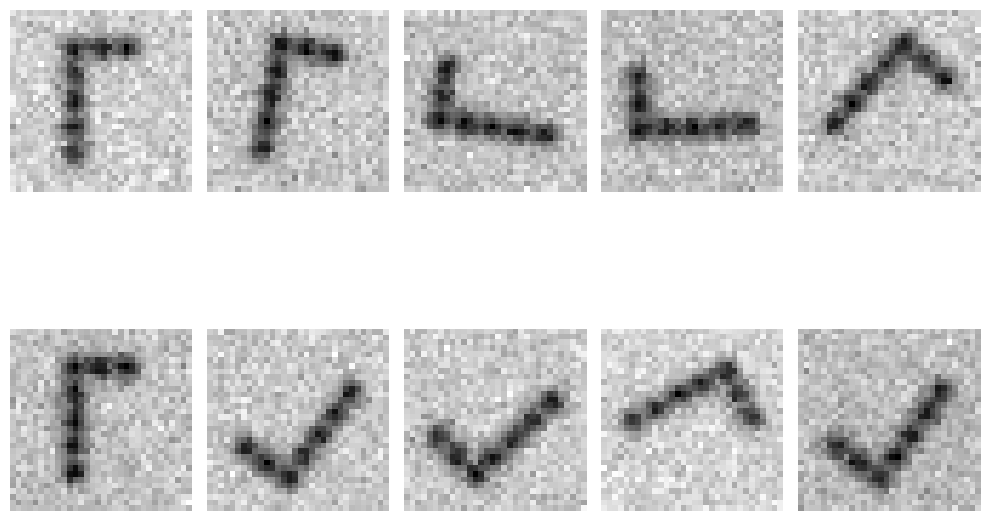

In [12]:
Noisy_Images = torch.repeat_interleave(Images, 15, dim=0)
Noisy_Images = Noisy_Images + torch.randn_like(Noisy_Images) * 0.1
Noisy_Images = Noisy_Images[torch.randperm(Noisy_Images.size(0))]

selected_images = Noisy_Images[:10]

# Plot the selected images
fig, axs = plt.subplots(2, 5, figsize=(10, 8))
axs = axs.flatten()

for i in range(10):
    axs[i].imshow(selected_images[i], cmap='gray')
    axs[i].axis('off')

plt.tight_layout()
plt.show()

In [13]:

# Save each image to the directory
for i in range(Noisy_Images.shape[0]):
    image = Noisy_Images[i]
    save_image(image, os.path.join(save_path, f'IMG_{i+1}.png'))